In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
crimeDF= pd.read_csv("Seattle_crime.csv", low_memory=False)
weatherDF = pd.read_csv("Seattle_weather.csv")

C:\Users\dylan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
crimeDF.head()

,Report Number,Offense Start DateTime,Offense End DateTime,Report DateTime,Crime Against Category,Offense Parent Group,Offense
0,2020-044620,2/5/2020 10:10,NaN,2/5/2020 11:24,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations
1,2020-044452,2/3/2020 8:00,2/4/2020 8:00,2/5/2020 10:06,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories
2,2020-044465,2/2/2020 20:30,2/2/2020 21:30,2/5/2020 9:39,PROPERTY,ROBBERY,Robbery
3,2020-044225,2/5/2020 1:17,2/5/2020 2:21,2/5/2020 3:30,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property
4,2020-044076,2/5/2020 0:51,NaN,2/5/2020 0:51,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence


In [5]:
weatherDF.head()

,DATE,PRCP,TMAX,TMIN,RAIN,TAVG
0,12/14/2017,0.0,50.0,36.0,False,43.0
1,12/13/2017,0.0,48.0,34.0,False,41.0
2,12/12/2017,0.0,46.0,32.0,False,39.0
3,12/11/2017,0.0,49.0,29.0,False,39.0
4,12/10/2017,0.0,49.0,34.0,False,41.5


In [6]:
df_split = crimeDF['Offense Start DateTime'].str.split(' ',expand=True)

In [7]:
crimeDF['Offense Start DateTime'] = df_split[0]
crimeDF.rename(columns={"Offense Start DateTime": "DATE"},inplace = True)

In [8]:
crimeDF.drop('Offense End DateTime', axis=1, inplace=True)
crimeDF.drop('Report DateTime', axis=1, inplace=True)
crimeDF.drop('Report Number', axis=1, inplace=True)

In [9]:
crimeDF

,DATE,Crime Against Category,Offense Parent Group,Offense
0,2/5/2020,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations
1,2/3/2020,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories
2,2/2/2020,PROPERTY,ROBBERY,Robbery
3,2/5/2020,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property
4,2/5/2020,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence
...,...,...,...,...
1012484,7/13/2013,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft
1012485,6/26/2013,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft
1012486,2/14/2012,PROPERTY,LARCENY-THEFT,Shoplifting
1012487,9/19/2010,PROPERTY,LARCENY-THEFT,Shoplifting


In [10]:
# weatherDF.to_csv('Seattle_weather_trimmed.csv')
# crimeDF.to_csv('Seattle_crime_trimmed.csv')

In [17]:
un = crimeDF['Crime Against Category'].unique()
un

array(['SOCIETY', 'PROPERTY', 'PERSON', 'NOT_A_CRIME'], dtype=object)

In [11]:
crime_2017= pd.read_csv("Seattle_crime_2017.csv", low_memory=False)
weather_2017 = pd.read_csv("Seattle_weather_2017.csv")

In [34]:
joined = pd.merge(crime_2017, weather_2017,how='inner',on='DATE')

In [35]:
joined

,DATE,Crime Against Category,Offense Parent Group,Offense,PRCP,TMAX,TMIN,RAIN,TAVG
0,4/19/2017,PROPERTY,LARCENY-THEFT,Theft From Motor Vehicle,0.35,56,46,True,51.0
1,4/19/2017,PROPERTY,LARCENY-THEFT,All Other Larceny,0.35,56,46,True,51.0
2,4/19/2017,PROPERTY,FRAUD OFFENSES,Impersonation,0.35,56,46,True,51.0
3,4/19/2017,PROPERTY,LARCENY-THEFT,Theft From Building,0.35,56,46,True,51.0
4,4/19/2017,PROPERTY,FRAUD OFFENSES,Impersonation,0.35,56,46,True,51.0
...,...,...,...,...,...,...,...,...,...
69687,1/16/2017,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,0.00,45,30,False,37.5
69688,1/16/2017,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,0.00,45,30,False,37.5
69689,1/16/2017,PROPERTY,LARCENY-THEFT,Shoplifting,0.00,45,30,False,37.5
69690,1/16/2017,PROPERTY,LARCENY-THEFT,Shoplifting,0.00,45,30,False,37.5


#### Probability of Offense Parent Group Given Cold, Mild, or Hot:

In [36]:
types = {'HUMAN TRAFFICKING': 'Person', 'SEX OFFENSES, CONSENSUAL': 'Person','GAMBLING OFFENSES':'Person','BRIBERY': 'Society',
        'LIQUOR LAW VIOLATIONS':'Society','CURFEW/LOITERING/VAGRANCY VIOLATIONS':'Society','PORNOGRAPHY/OBSCENE MATERIAL':'Society',
        'EMBEZZLEMENT':'Society','EXTORTION/BLACKMAIL':'Person','HOMICIDE OFFENSES':'Person','PEEPING TOM':'Person','ARSON':'Property',
        'KIDNAPPING/ABDUCTION':'Person','COUNTERFEITING/FORGERY':'Society','BURGLARY/BREAKING&ENTERING':'Property','ASSAULT OFFENSES':'Person',
        'TRESPASS OF REAL PROPERTY':'Property','WEAPON LAW VIOLATIONS':'Society','STOLEN PROPERTY OFFENSES':'Property','FAMILY OFFENSES, NONVIOLENT':'Person',
        'DRUG/NARCOTIC OFFENSES':'Society','ROBBERY':'Property','PROSTITUTION OFFENSES':'Society','DRIVING UNDER THE INFLUENCE':'Society',
        'DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY':'Property','SEX OFFENSES':'Person','MOTOR VEHICLE THEFT':'Property','BAD CHECKS':'Society',
        'FRAUD OFFENSES':'Society','LARCENY-THEFT':'Property'}
joined['Offense Parent Group'] = joined['Offense Parent Group'].map(types)

In [37]:
offenses = joined['Offense Parent Group'].unique()
offenses

array(['Property', 'Society', 'Person'], dtype=object)

In [45]:
temp = joined['TAVG'].astype(float)
tot_cold = temp[temp < 45.0].count()
tot_mild = temp[(temp >= 45.0) & (temp <= 75.0)].count()
tot_hot = temp[temp > 75.0].count()
total = temp.count()
cold = []
mild = []
hot = []
for offense in offenses:
    num_cold = len(joined[(joined['Offense Parent Group'] == offense) & (temp < 45.0)])
    num_mild = len(joined[(joined['Offense Parent Group'] == offense) & (temp >= 45.0) & (temp <= 75.0)])
    num_hot = len(joined[(joined['Offense Parent Group'] == offense) & (temp > 75.0)])
    cold.append((offense,(num_cold/tot_cold).round(5)))
    mild.append((offense,(num_mild/tot_mild).round(5)))
    hot.append((offense,(num_hot/tot_hot).round(5)))

In [46]:
cold

[('Property', 0.70095), ('Society', 0.14162), ('Person', 0.15743)]

<BarContainer object of 3 artists>

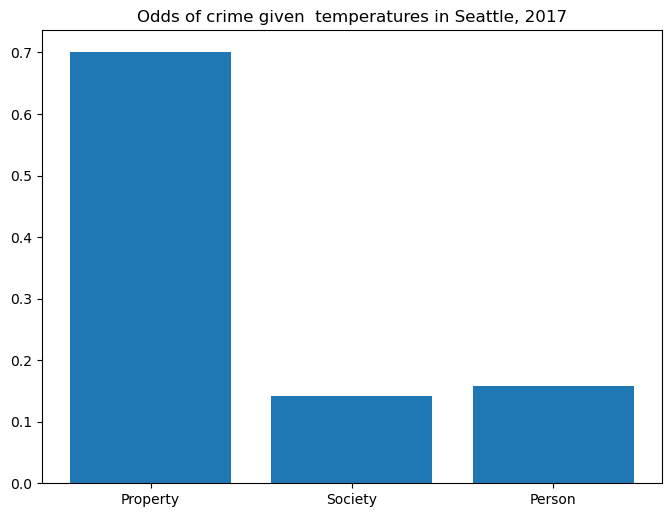

In [47]:
off = []
perc = []
for o,p in cold:
    off.append(o)
    perc.append(p)

figure(figsize=(8, 6), dpi=100)
plt.title("Odds of crime given  temperatures in Seattle, 2017")
plt.bar(off,perc)

In [48]:
mild

[('Property', 0.70089), ('Society', 0.13396), ('Person', 0.16514)]

<BarContainer object of 3 artists>

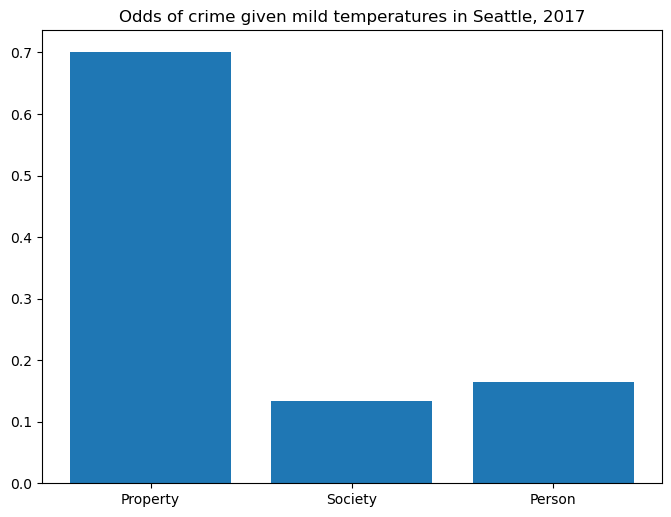

In [49]:
off = []
perc = []
for o,p in mild:
    off.append(o)
    perc.append(p)

figure(figsize=(8, 6), dpi=100)
plt.title("Odds of crime given mild temperatures in Seattle, 2017")
plt.bar(off,perc)

In [50]:
hot

[('Property', 0.6953), ('Society', 0.12318), ('Person', 0.18152)]

<BarContainer object of 3 artists>

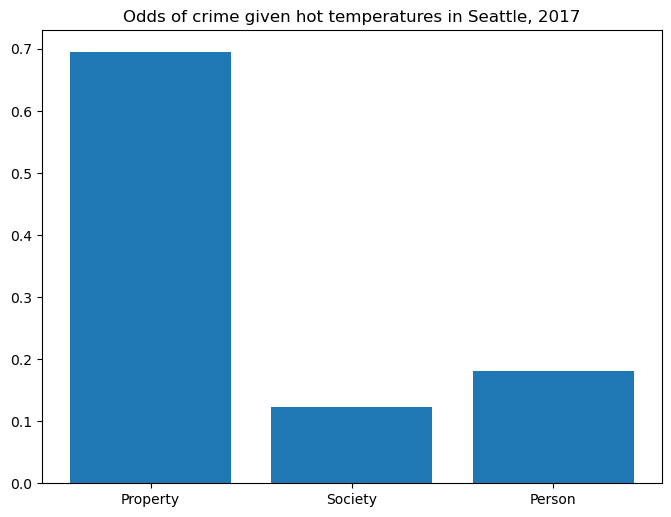

In [51]:
off = []
perc = []
for o,p in hot:
    off.append(o)
    perc.append(p)

figure(figsize=(8, 6), dpi=100)
plt.title("Odds of crime given hot temperatures in Seattle, 2017")
plt.bar(off,perc)